### Import Libraries

In [1]:
import sys
sys.path.append('../')

from awpy.parser.demoparser import DemoParser
from awpy.analytics.map_control import extract_teams_metadata, calc_frame_map_control_values, calculate_round_map_control_metrics
from awpy.visualization.plot import plot_frame_map_control, plot_round_map_control, plot_map_control_metrics

import os
import matplotlib
%matplotlib inline

### Import and Parse Demo

The demo used for this notebook is the Inferno match between FaZe and Cloud9 during the Boston Major Final. The demo can be downloaded from HLTV [here](https://www.hltv.org/matches/2318632/faze-vs-cloud9-eleague-major-2018). After downloading the demo, move it to the same folder this notebook is in. This should allow the notebook to access the demo.

In [2]:
demo_filepath = "faze-vs-cloud9-m3-inferno.dem"
demo_parser = DemoParser(demofile = demo_filepath, demo_id = "Faze-C9-Inferno", parse_rate=128)

# Parse the demofile, output results to a dictionary and a dataframe.
#data_df = demo_parser.parse(return_type="df")
data = demo_parser.parse()


### Calculate and Visualize Frame Map Control Values

The following functions can be used to visualize the map control progress for an entire round.

* `extract_player_positions` can be used to extract alive player positions for both teams
* `calc_map_control` can be used to calculate map control values for each side for a given frame
* `plot_map_control_snapshot` can be used to visualize map control and player positions for a given set of map control dictionaries  
* `plot_frame_map_control` can be used to visualize map control and player positions for a given frame

In [3]:
'''
Parse frame to extract alive player locations
'''
player_positions = extract_teams_metadata(data['gameRounds'][16]['frames'][8])

In [4]:
'''
Calculate map control values for tiles based on
current player positions in given frame
'''
map_control_values = calc_frame_map_control_values(data['mapName'], data['gameRounds'][16]['frames'][8])

/var/folders/xb/h1d9f0cd4fq2pwq3r5y3s2000000gn/T/ipykernel_46391/776804216.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  map_control_fig.show()


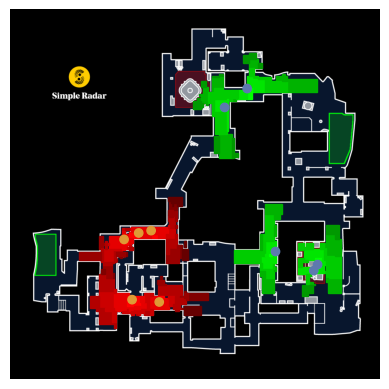

In [5]:
'''
Visualize map control given awpy frame
'''
testFrame = data['gameRounds'][16]['frames'][8]
map_control_fig, map_control_axes = plot_frame_map_control(data['mapName'], testFrame, plot_type = 'players')
map_control_fig.show()

### Visualize Map Control for Round

The following functions can be used to visualize the map control progress for an entire round.

* `create_round_map_control_gif` can be used to save a gif to file whose individual frames are similar to the above visualizations. 
* `calculate_round_map_control_metrics` can be used to return a list of map control metrics for a given awpy round
* `plot_map_control_metrics` can be used to generate a plot for a given list of map control metrics
* `save_map_control_graphic` can be used to generate a map control graphic (gif including minimap visualization and map control metric plot) for an entire round and save it to file

In [7]:
'''
Create map control gif for a given awpy frame
'''

testRound = data['gameRounds'][16]
plot_round_map_control('./results/tmp.gif',
                       data['mapName'], testRound, plot_type='players')


Saving/loading frames
Creating gif!


True

In [8]:
'''
Generate map control metrics for each frame
in a given awpy round
'''
mcMetrics = calculate_round_map_control_metrics(data['mapName'], data['gameRounds'][29])

/var/folders/xb/h1d9f0cd4fq2pwq3r5y3s2000000gn/T/ipykernel_46391/2345326518.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  map_control_metric_fig.show()


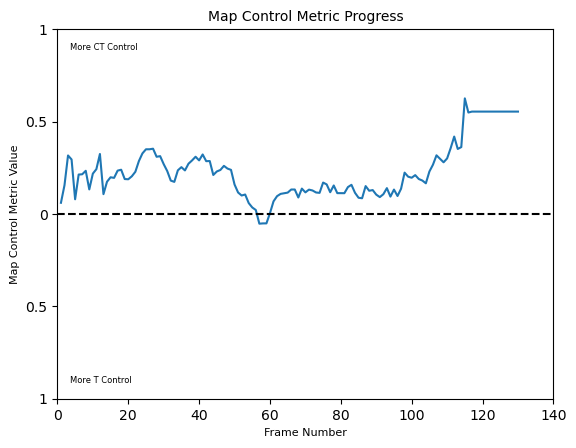

In [9]:
'''
Create plot for given list of map control metrics
'''
map_control_metric_fig, map_control_metric_ax = plot_map_control_metrics(mcMetrics)
map_control_metric_fig.show()